# Projet Morpion

In [9]:
# Importation de notre classe Morpion depuis le fichier morpion.py
# Cette classe contient l'implémentation du jeu de base
from morpion import Morpion

# Matplotlib : bibliothèque de visualisation pour créer des graphiques
# Nous l'utiliserons pour visualiser l'apprentissage de l'IA
import matplotlib.pyplot as plt

# NumPy : bibliothèque pour le calcul scientifique
# Utilisée pour les opérations mathématiques et la manipulation de tableaux
import numpy as np

# Module random pour générer des nombres aléatoires
# Utilisé pour l'exploration dans l'algorithme de Q-Learning
import random

# IPython.display : module pour contrôler l'affichage dans Jupyter
# clear_output permet d'effacer la sortie précédente pour une meilleure visualisation
from IPython.display import clear_output

In [10]:
# Création d'une nouvelle instance du jeu
game = Morpion()

# L'IA (joueur 1) joue en position 1 (case en haut à gauche)
game.jouer_coup(1, 1)  # Placera un 'O'

# Le joueur humain (joueur 2) joue en position 2 (case en haut au milieu)
game.jouer_coup(2, 2)  # Placera un 'X'

# Affichage de l'état actuel du plateau
game.afficher_plateau()

|     |     
  O  |  X  |  3
_____|_____|_____
     |     |     
  4  |  5  |  6
_____|_____|_____
     |     |     
  7  |  8  |  9
     |     |

In [11]:
def choisir_coup(coups_possibles, etat_actuel, etats_et_valeurs, epsilon=1):
    """
    Sélectionne le prochain coup en utilisant la stratégie epsilon-greedy du Q-Learning.

    Cette fonction implémente le compromis exploration/exploitation :
    - Exploration (probabilité epsilon) : choisit un coup au hasard pour découvrir de nouvelles stratégies
    - Exploitation (probabilité 1-epsilon) : choisit le coup avec la plus grande valeur connue

    Arguments:
    -----------
    coups_possibles : list
        Liste des coups qui peuvent être joués
    etat_actuel : list
        Vecteur représentant l'état actuel du jeu
    etats_et_valeurs : dict
        Dictionnaire contenant les valeurs associées à chaque état déjà rencontré
    epsilon : float, optionnel (défaut=0.1)
        Probabilité d'explorer (choisir un coup aléatoire)

    Retourne:
    -----------
    action : int
        Le coup choisi à jouer
    """
    # Décision d'explorer ou d'exploiter
    # exploitation = 0 : on explore (probabilité epsilon)
    # exploitation = 1 : on exploite (probabilité 1-epsilon)
    exploitation = np.random.choice([0, 1], p=[epsilon, 1 - epsilon])

    if exploitation == 0:
        # EXPLORATION : On choisit un coup au hasard parmi les coups possibles
        action = np.random.choice(coups_possibles)

    else:
        # EXPLOITATION : On cherche le coup qui maximise la valeur selon l'expérience passée

        # Initialisation de la valeur maximale
        meilleure_valeur = -999

        # On évalue chaque coup possible
        for coup in coups_possibles:
            # Copie de l'état actuel pour simulation
            etat_test = etat_actuel.copy()
            # Ajout du coup potentiel à l'état
            etat_test.append(coup)

            # Vérification si cet état a déjà été rencontré
            if tuple(etat_test) in etats_et_valeurs.keys():
                # Si oui, on récupère sa valeur
                valeur = etats_et_valeurs[tuple(etat_test)]
            else:
                # Si non, on initialise sa valeur à 0
                valeur = 0

            # Si ce coup mène à une meilleure valeur que ce qu'on a trouvé jusqu'ici
            if valeur > meilleure_valeur:
                # On le garde comme meilleur coup
                action = coup
                meilleure_valeur = valeur

            # On retire le coup testé de l'état avant de tester le suivant
            etat_test.remove(coup)

    return action

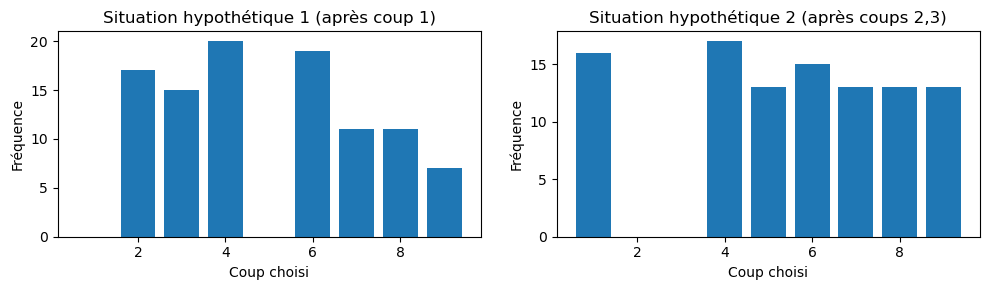

In [12]:
# Création d'un dictionnaire d'états et leurs valeurs associées
# Chaque clé représente un état du jeu sous forme de tuple, et chaque valeur est une estimation de la récompense attendue pour cet état.
etats_et_valeurs = {
    (1): 0.1,          # État après le coup 1 : faible valeur estimée
    (1, 5, 9): 0.02,   # État après les coups 1, 5 puis 9 : faible valeur estimée
    (1, 5, 3): 0.4,    # État après les coups 1, 5 puis 3 : valeur haute estimée
    (2): 0.1,          # État après le coup 2 : faible valeur estimée
    (2, 3, 1): 0.2,    # État après les coups 2, 3, puis 1 : faible valeur estimée
    (2, 3, 5): 0.5,    # État après les coups 2, 3, puis 9 : bonne valeur estimée
}

# Test de la Situation Hypothétique 1
# ----------------------------------
# On simule une situation où le coup 1 a déjà été joué, et on observe quel coup l'agent choisit ensuite.

# État initial : coup 1 déjà joué
etat_actuel_1 = [1, 5]

# Coups encore disponibles sur le plateau
coups_possibles_1 = [2, 3, 4, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
# Cela permet de visualiser le compromis exploration/exploitation en action.
coups_choisis_1 = []
for i in range(100):
    coups_choisis_1.append(choisir_coup(coups_possibles_1, etat_actuel_1, etats_et_valeurs))

# Test de la Situation Hypothétique 2
# ----------------------------------
# On simule une situation où les coups 2 puis 3 ont déjà été joués, et on observe quel coup l'agent choisit ensuite.

# État initial : coups 2 puis 3 déjà joués
etat_actuel_2 = [2, 3]

# Coups encore disponibles sur le plateau
coups_possibles_2 = [1, 4, 5, 6, 7, 8, 9]

# On lance 100 simulations pour voir quels coups sont choisis par l'agent.
coups_choisis_2 = []
for i in range(100):
    coups_choisis_2.append(choisir_coup(coups_possibles_2, etat_actuel_2, etats_et_valeurs))

# Visualisation des résultats avec deux histogrammes
# ------------------------------------------------
# On crée deux histogrammes pour comparer les choix de l'agent dans les deux situations hypothétiques.

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Histogramme pour la situation 1
axes[0].hist(coups_choisis_1, bins=range(1, 11), align='left', rwidth=0.8)
axes[0].set_title('Situation hypothétique 1 (après coup 1)')
axes[0].set_xlabel('Coup choisi')
axes[0].set_ylabel('Fréquence')

# Histogramme pour la situation 2
axes[1].hist(coups_choisis_2, bins=range(1, 11), align='left', rwidth=0.8)
axes[1].set_title('Situation hypothétique 2 (après coups 2,3)')
axes[1].set_xlabel('Coup choisi')
axes[1].set_ylabel('Fréquence')

# Ajustement de la disposition pour éviter les chevauchements
plt.tight_layout()

# Affichage des histogrammes
plt.show()

In [13]:
def attribuer_recompense(etats_et_valeurs, etats, recompense, taux_apprentissage=0.5, facteur_reduction=0.9):
    """
    Met à jour les valeurs associées à chaque état en fonction de la récompense obtenue.
    Cette fonction implémente un processus de rétropropagation des récompenses,
    parcourant les états de la fin vers le début pour mettre à jour leurs valeurs
    en fonction du résultat final de la partie.

    Arguments:
    -----------
    etats_et_valeurs : dict
        Dictionnaire stockant les valeurs de chaque état rencontré au cours des parties.
        Les clés sont des tuples représentant les états, et les valeurs sont les récompenses cumulées associées.
    etats : list
        Liste des états traversés pendant la partie (chaque état est une séquence de coups joués).
    recompense : float
        Valeur de récompense finale obtenue à la fin de la partie :
        - Positive si le joueur a gagné.
        - Négative si le joueur a perdu.
        - Nulle si la partie s'est terminée par un match nul.
    taux_apprentissage : float, optionnel (défaut=0.5)
        Alpha (α) : Contrôle la vitesse d'apprentissage.
        Une valeur élevée signifie que l'agent mettra plus de poids sur les nouvelles informations,
        tandis qu'une valeur basse favorise la conservation des connaissances antérieures.
    facteur_reduction : float, optionnel (défaut=0.9)
        Gamma (γ) : Diminue l'importance des récompenses éloignées.
        Cela permet de donner plus de poids aux récompenses immédiates qu'à celles éloignées dans le temps.

    Retourne:
    -----------
    dict
        Le dictionnaire `etats_et_valeurs` mis à jour avec les nouvelles valeurs associées aux états.

    Formule utilisée:
    ----------------
    nouvelle_valeur = ancienne_valeur + α * (γ * récompense - ancienne_valeur)
    où:
    - α (taux_apprentissage) contrôle l'importance des nouvelles informations.
    - γ (facteur_reduction) diminue l'importance des états plus anciens.
    """

    # On parcourt les états en sens inverse (de la fin vers le début) pour propager la récompense.
    for etat in reversed(etats):
        # Conversion de l'état en tuple pour pouvoir l'utiliser comme clé dans le dictionnaire.
        etat_tuple = tuple(etat)

        # Si cet état a déjà été rencontré dans le dictionnaire :
        if etat_tuple in etats_et_valeurs.keys():
            # Mise à jour de sa valeur selon la formule du Q-Learning.
            # La nouvelle valeur est calculée en combinant l'ancienne valeur et la récompense ajustée.
            etats_et_valeurs[etat_tuple] += taux_apprentissage * (
                facteur_reduction * recompense - etats_et_valeurs[etat_tuple]
            )

        # Si c'est un nouvel état (non présent dans le dictionnaire) et que ce n'est pas le dernier état :
        elif etat != etats[-1]:
            # Initialisation de la valeur pour ce nouvel état.
            # On utilise une estimation basée sur la récompense immédiate ajustée.
            etats_et_valeurs[etat_tuple] = taux_apprentissage * facteur_reduction * recompense

        # Si c'est c'est l'état de fin de partie
        else:
            # On affecte la récompense finale
            etats_et_valeurs[etat_tuple] = recompense

        # Propagation de la récompense :
        # La récompense pour l'état suivant devient la valeur actuelle de l'état courant.
        # Cela permet de rétropropager les récompenses à travers les états précédents.
        recompense = etats_et_valeurs[etat_tuple]

    # Retour du dictionnaire mis à jour.
    return etats_et_valeurs

In [14]:
# Paramètres de test
etats = [
    [1],          # Joueur 1 joue le coup 1
    [1, 5],       # Joueur 2 joue le coup 5
    [1, 5, 3],    # Joueur 1 joue le coup 3
    [1, 5, 3, 7], # Joueur 2 joue le coup 7
    [1, 5, 3, 7, 2]  # Joueur 1 joue le coup 2 (victoire)
]

etats_et_valeurs = {
    (1,): 0.0,
    (1, 5): 0.0,
    (1, 5, 3): 0.0,
    (1, 5, 3, 7): 0.0
}

recompense_finale = 1.0  # Le joueur 1 a gagné

print("Valeurs avant mise à jour :")
for etat, valeur in etats_et_valeurs.items():
    print(f"État {list(etat)} : {valeur:.3f}")

# Mise à jour des valeurs avec la fonction existante
nouvelles_valeurs = attribuer_recompense(
    etats_et_valeurs, etats, recompense_finale, taux_apprentissage=0.5, facteur_reduction=0.9
)

# Affichage des résultats
print("Valeurs mises à jour des états :")
for etat, valeur in nouvelles_valeurs.items():
    print(f"État {list(etat)} : {valeur:.3f}")

Valeurs avant mise à jour :
État [1] : 0.000
État [1, 5] : 0.000
État [1, 5, 3] : 0.000
État [1, 5, 3, 7] : 0.000
Valeurs mises à jour des états :
État [1] : 0.041
État [1, 5] : 0.091
État [1, 5, 3] : 0.203
État [1, 5, 3, 7] : 0.450
État [1, 5, 3, 7, 2] : 1.000


In [15]:
def entrainement_autonome(nb_parties, strategie_j1, strategie_j2, epsilon_j1=0.1, epsilon_j2=0.1,
                         alpha_j1=0.2, alpha_j2=0.2, gamma_j1=0.9, gamma_j2=0.9,
                         afficher_partie=False, joueur1={}, joueur2={}):
    """
    Permet à deux joueurs (IA ou aléatoire) de s'entraîner en jouant l'un contre l'autre.

    Arguments:
    -----------
    nb_parties : int
        Nombre de parties à jouer
    strategie_j1, strategie_j2 : str
        Stratégie des joueurs ('rl' pour Q-Learning ou 'random' pour aléatoire)
    epsilon_j1, epsilon_j2 : float
        Taux d'exploration pour chaque joueur (défaut: 0.1)
    alpha_j1, alpha_j2 : float
        Taux d'apprentissage pour chaque joueur (défaut: 0.2)
    gamma_j1, gamma_j2 : float
        Facteur de réduction pour les récompenses éloignées (défaut: 0.9)
    afficher_partie : bool
        Si True, affiche certaines parties pour suivre l'évolution
    joueur1, joueur2 : dict
        Dictionnaires stockant les valeurs d'états pour chaque joueur

    Retourne:
    -----------
    tuple : (victoires_j1, victoires_j2, nuls, joueur1, joueur2)
        Historique des résultats et états mis à jour des joueurs
    """
    # Initialisation des listes pour suivre les résultats
    victoires_j1 = []  # 1 pour victoire, 0 sinon
    victoires_j2 = []  # 1 pour victoire, 0 sinon
    matchs_nuls = []   # 1 pour match nul, 0 sinon

    # Boucle principale d'entraînement
    for i in range(nb_parties):
        # Initialisation d'une nouvelle partie
        joueur_actuel = 1
        partie_en_cours = True
        jeu = Morpion()

        # Variables de suivi de la partie
        numero_coup = 1
        coups_possibles = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        etat_actuel = []
        gagnant = ''

        # Listes pour stocker les états traversés par chaque joueur
        etats_j1 = []
        etats_j2 = []

        # Boucle d'une partie (maximum 9 coups)
        while numero_coup < 10:
            # Vérification si la partie est terminée
            if gagnant in ['X', 'O']:
                # Affichage périodique des parties
                if ((i+1) % 5000 == 0) and afficher_partie:
                    print(f'Partie numéro {i + 1}\\n')
                    jeu.afficher_plateau()
                break

            # Sélection du coup selon la stratégie du joueur actuel
            if joueur_actuel == 1:
                if strategie_j1 == 'rl':
                    coup = choisir_coup(coups_possibles, etat_actuel, joueur1, epsilon_j1)
                else:  # stratégie aléatoire
                    coup = np.random.choice(coups_possibles)
            else:
                if strategie_j2 == 'rl':
                    coup = choisir_coup(coups_possibles, etat_actuel, joueur2, epsilon_j2)
                else:  # stratégie aléatoire
                    coup = np.random.choice(coups_possibles)

            # Jouer le coup et mettre à jour l'état du jeu
            _, coups_possibles = jeu.jouer_coup(coup, joueur_actuel)
            gagnant = jeu.verifier_gagnant()

            # Mise à jour des états
            numero_coup += 1
            etat_actuel.append(coup)
            etats_j1.append(list(etat_actuel))
            etats_j2.append(list(etat_actuel))

            # Changement de joueur
            joueur_actuel = 3 - joueur_actuel  # Alterne entre 1 et 2

        # Attribution des récompenses selon le résultat
        if gagnant == 'O':  # Victoire J1
            joueur1 = attribuer_recompense(joueur1, etats_j1, 1, alpha_j1, gamma_j1)
            joueur2 = attribuer_recompense(joueur2, etats_j2, -1, alpha_j2, gamma_j2)
            victoires_j1.append(1)
            victoires_j2.append(0)
            matchs_nuls.append(0)
        elif gagnant == 'X':  # Victoire J2
            joueur2 = attribuer_recompense(joueur2, etats_j2, 1, alpha_j2, gamma_j2)
            joueur1 = attribuer_recompense(joueur1, etats_j1, -1, alpha_j1, gamma_j1)
            victoires_j1.append(0)
            victoires_j2.append(1)
            matchs_nuls.append(0)
        else:  # Match nul
            joueur1 = attribuer_recompense(joueur1, etats_j1, 0.5, alpha_j1, gamma_j1)
            joueur2 = attribuer_recompense(joueur2, etats_j2, 0.5, alpha_j2, gamma_j2)
            victoires_j1.append(0)
            victoires_j2.append(0)
            matchs_nuls.append(1)

    return victoires_j1, victoires_j2, matchs_nuls, joueur1, joueur2

def calculer_somme_cumulative(historique_victoires):
    """
    Calcule la somme cumulative des victoires pour visualiser la progression.

    Arguments:
    ----------
    historique_victoires : list
        Liste de 1 (victoire) et 0 (défaite/nul)

    Retourne:
    ----------
    tuple : (parties, somme_cumulative)
        Numéros des parties et somme cumulative des victoires
    """
    parties = np.arange(0, len(historique_victoires))
    somme_cumulative = []
    total = 0

    for i in range(len(parties)):
        total += historique_victoires[i]
        somme_cumulative.append(total)

    return parties + 1, np.array(somme_cumulative)

In [16]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement où deux joueurs aléatoires s'affrontent pendant 10^4 parties.

# Appel de la fonction d'entraînement avec les paramètres suivants :
# - nb_parties : Nombre total de parties à jouer (10 000 dans ce cas)
# - strategie_j1, strategie_j2 : Stratégies utilisées par chaque joueur ('random' signifie choix aléatoire des coups)
# - afficher_partie : Booléen indiquant si certaines parties doivent être affichées pour suivre l'évolution

# Les résultats retournés sont :
# - victoires_joueur_1 : Liste des victoires du joueur 1 (1 pour une victoire, 0 sinon)
# - victoires_joueur_2 : Liste des victoires du joueur 2 (1 pour une victoire, 0 sinon)
# - matchs_nuls : Liste des matchs nuls (1 pour un nul, 0 sinon)
# - joueur_1 : Dictionnaire contenant les valeurs d'états mis à jour pour le joueur 1
# - joueur_2 : Dictionnaire contenant les valeurs d'états mis à jour pour le joueur 2

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='random',
        strategie_j2='random',
        afficher_partie=True
    )

Partie numéro 5000\n


|     |     
  X  |  X  |  X
_____|_____|_____
     |     |     
  O  |  5  |  6
_____|_____|_____
     |     |     
  7  |  O  |  O
     |     |

Partie numéro 10000\n


|     |     
  O  |  2  |  X
_____|_____|_____
     |     |     
  X  |  5  |  X
_____|_____|_____
     |     |     
  O  |  O  |  O
     |     |

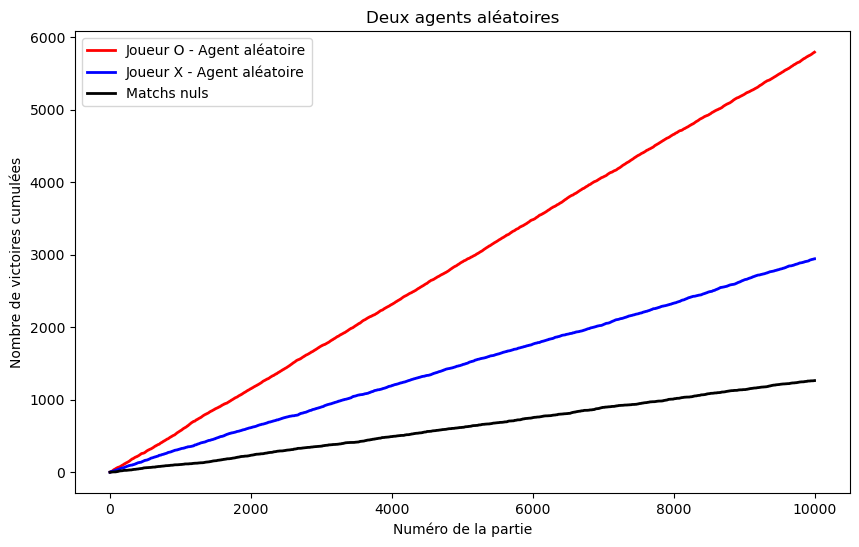

Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : 57.92 %
Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : 29.44 %
Pourcentage de matchs nuls : 12.64 %


In [17]:
# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)
# Pour le joueur 2 (joueur X)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)
# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

# Tracé des courbes de victoires cumulées pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent aléatoire'
)  # Courbe rouge pour le joueur O
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent aléatoire'
)  # Courbe bleue pour le joueur X
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des légendes
plt.title('Deux agents aléatoires')  # Titre du graphique
plt.xlabel('Numéro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumulées')  # Label de l'axe des ordonnées
plt.legend()  # Affichage de la légende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [18]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre un agent aléatoire et un agent d'apprentissage par renforcement

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='rl',
        strategie_j2='random',
        afficher_partie=True
    )

Partie numéro 5000\n


|     |     
  O  |  2  |  3
_____|_____|_____
     |     |     
  O  |  O  |  X
_____|_____|_____
     |     |     
  X  |  X  |  O
     |     |

Partie numéro 10000\n


|     |     
  X  |  2  |  3
_____|_____|_____
     |     |     
  O  |  O  |  O
_____|_____|_____
     |     |     
  X  |  8  |  9
     |     |

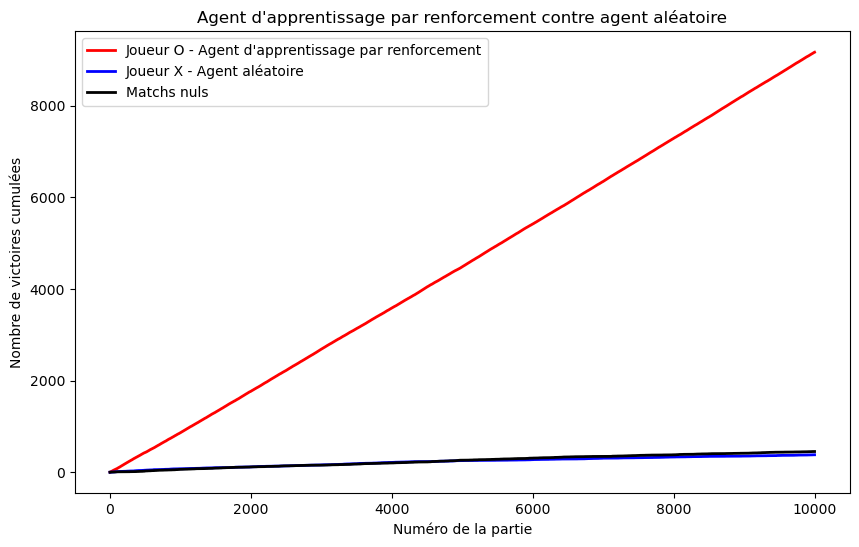

Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement) : 91.67 %
Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : 3.81 %
Pourcentage de matchs nuls : 4.52 %


In [19]:
# Tracer les résultats de l'entraînement

# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O - Agent d'apprentissage par renforcement)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)

# Pour le joueur 2 (joueur X - Agent aléatoire)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)

# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

# Tracé des courbes de victoires cumulées pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent d\'apprentissage par renforcement'
)  # Courbe rouge pour le joueur O (RL agent)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent aléatoire'
)  # Courbe bleue pour le joueur X (Random agent)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des légendes
plt.title('Agent d\'apprentissage par renforcement contre agent aléatoire')  # Titre du graphique
plt.xlabel('Numéro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumulées')  # Label de l'axe des ordonnées
plt.legend()  # Affichage de la légende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement)
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2 (Agent aléatoire)
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent aléatoire) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [20]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre un agent d'apprentissage par renforcement et un agent aléatoire

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='random',
        strategie_j2='rl',
        afficher_partie=True
    )

Partie numéro 5000\n


|     |     
  X  |  O  |  O
_____|_____|_____
     |     |     
  X  |  X  |  X
_____|_____|_____
     |     |     
  O  |  8  |  O
     |     |

Partie numéro 10000\n


|     |     
  O  |  2  |  X
_____|_____|_____
     |     |     
  O  |  X  |  O
_____|_____|_____
     |     |     
  O  |  X  |  9
     |     |

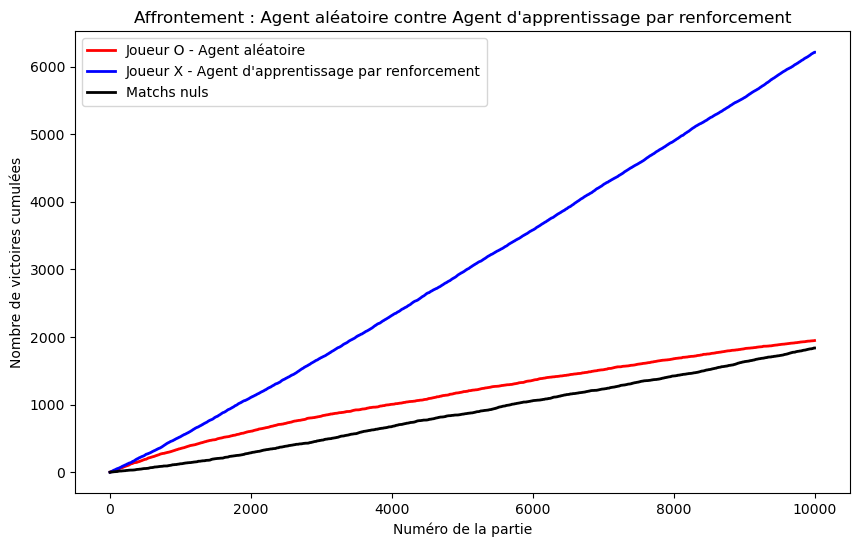

Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : 19.48 %
Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement) : 62.14 %
Pourcentage de matchs nuls : 18.38 %


In [21]:
# Tracer les résultats de l'affrontement entre un agent aléatoire et un agent d'apprentissage par renforcement

# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O - Agent aléatoire)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)

# Pour le joueur 2 (joueur X - Agent d'apprentissage par renforcement)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)

# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

# Tracé des courbes de victoires cumulées pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent aléatoire'
)  # Courbe rouge pour le joueur O (Agent aléatoire)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent d\'apprentissage par renforcement'
)  # Courbe bleue pour le joueur X (RL agent)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des légendes
plt.title('Affrontement : Agent aléatoire contre Agent d\'apprentissage par renforcement')  # Titre du graphique
plt.xlabel('Numéro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumulées')  # Label de l'axe des ordonnées
plt.legend()  # Affichage de la légende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1 (Agent aléatoire)
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent aléatoire) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement)
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [22]:
# Entraînement autonome des joueurs sur un grand nombre de parties
# Ici, nous lançons une session d'entraînement entre deux agents d'apprentissage par renforcement

victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**4,
        strategie_j1='rl',
        strategie_j2='rl',
        afficher_partie=True
    )

Partie numéro 5000\n


|     |     
  X  |  O  |  3
_____|_____|_____
     |     |     
  X  |  O  |  O
_____|_____|_____
     |     |     
  7  |  O  |  X
     |     |

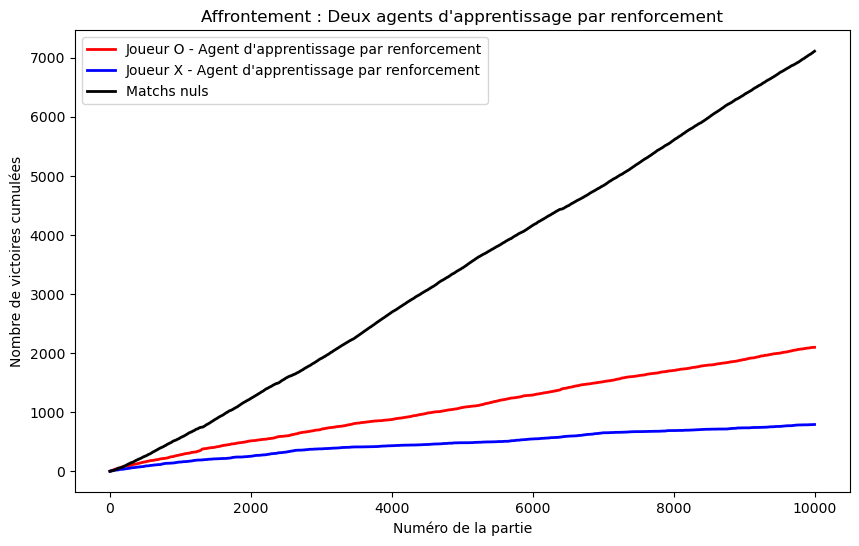

Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement) : 20.98 %
Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement) : 7.91 %
Pourcentage de matchs nuls : 71.11 %


In [23]:
# Tracer les résultats de l'affrontement entre deux agents d'apprentissage par renforcement

# Calcul des sommes cumulatives pour chaque joueur et les matchs nuls
# La fonction `cum_sum` permet de calculer la progression cumulative des victoires au fil des parties.

# Pour le joueur 1 (joueur O - Agent d'apprentissage par renforcement)
parties_joueur_1, victoires_cumulees_joueur_1 = calculer_somme_cumulative(victoires_joueur_1)

# Pour le joueur 2 (joueur X - Agent d'apprentissage par renforcement)
parties_joueur_2, victoires_cumulees_joueur_2 = calculer_somme_cumulative(victoires_joueur_2)

# Pour les matchs nuls
parties_nuls, matchs_nuls_cumules = calculer_somme_cumulative(matchs_nuls)

# Création d'une figure pour visualiser les résultats
plt.figure(figsize=(10, 6))  # Définition de la taille de la figure

# Tracé des courbes de victoires cumulées pour chaque joueur et les matchs nuls
plt.plot(
    parties_joueur_1, victoires_cumulees_joueur_1,
    color='r', linewidth=2, label='Joueur O - Agent d\'apprentissage par renforcement'
)  # Courbe rouge pour le joueur O (RL agent)
plt.plot(
    parties_joueur_2, victoires_cumulees_joueur_2,
    color='b', linewidth=2, label='Joueur X - Agent d\'apprentissage par renforcement'
)  # Courbe bleue pour le joueur X (RL agent)
plt.plot(
    parties_nuls, matchs_nuls_cumules,
    color='k', linewidth=2, label='Matchs nuls'
)  # Courbe noire pour les matchs nuls

# Ajout du titre et des légendes
plt.title('Affrontement : Deux agents d\'apprentissage par renforcement')  # Titre du graphique
plt.xlabel('Numéro de la partie')  # Label de l'axe des abscisses
plt.ylabel('Nombre de victoires cumulées')  # Label de l'axe des ordonnées
plt.legend()  # Affichage de la légende

# Affichage du graphique
plt.show()

# Calcul et affichage des pourcentages de victoires et de matchs nuls
# Pourcentage de victoires pour le joueur 1 (Agent d'apprentissage par renforcement)
pourcentage_victoires_joueur_1 = np.round(sum(victoires_joueur_1) / len(victoires_joueur_1) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 1 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_1} %')

# Pourcentage de victoires pour le joueur 2 (Agent d'apprentissage par renforcement)
pourcentage_victoires_joueur_2 = np.round(sum(victoires_joueur_2) / len(victoires_joueur_2) * 100, 4)
print(f'Pourcentage de victoires pour le joueur 2 (Agent d\'apprentissage par renforcement) : {pourcentage_victoires_joueur_2} %')

# Pourcentage de matchs nuls
pourcentage_matchs_nuls = np.round(sum(matchs_nuls) / len(matchs_nuls) * 100, 4)
print(f'Pourcentage de matchs nuls : {pourcentage_matchs_nuls} %')

In [27]:
from morpion import Morpion
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

# Phase 1 : Entraînement initial entre deux agents aléatoires
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'random', 'random')

# Phase 2 : Entraînement d'un agent RL contre un agent aléatoire (joueur 1 est RL, joueur 2 est aléatoire)
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'rl', 'random', joueur1=joueur_1, joueur2=joueur_2)

# Phase 3 : Entraînement d'un agent aléatoire contre un agent RL (joueur 1 est aléatoire, joueur 2 est RL)
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'random', 'rl', joueur1=joueur_1, joueur2=joueur_2)

# Phase 4 : Entraînement entre deux agents RL
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(10**4, 'rl', 'rl', joueur1=joueur_1, joueur2=joueur_2)

#Phase 5 : Optimisation des hyperparamètres
victoires_joueur_1, victoires_joueur_2, matchs_nuls, joueur_1, joueur_2 = \
    entrainement_autonome(
        nb_parties=10**5,
        strategie_j1='rl',
        strategie_j2='rl',
        epsilon_j1=0.1,
        epsilon_j2=0.1,
        alpha_j1=0.1,
        alpha_j2=0.1,
        gamma_j1=0.9,
        gamma_j2=0.9,
        joueur1=joueur_1,
        joueur2=joueur_2
    )

# Initialisation d'une nouvelle partie entre un joueur humain et un agent entraîné
joueur_actuel = 1  # Le joueur 1 commence (l'agent entraîné)
partie = Morpion()  # Création d'une instance du jeu du morpion

# Valeurs initiales pour la partie
numero_coup = 1  # Numéro du coup actuel
coups_possibles = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Liste des coups possibles au début de la partie
etat_actuel = []  # État actuel du plateau (liste des coups joués)
gagnant = ''  # Variable pour stocker le nom du gagnant ('X', 'O' ou vide si pas de gagnant)

# Boucle principale de la partie
while numero_coup <= 10:  # Maximum 9 coups + 1 pour éviter les erreurs
    clear_output(wait=True)  # Efface la sortie précédente pour afficher à jour le plateau
    partie.afficher_plateau(gagnant)  # Affiche l'état actuel du plateau et le gagnant (si applicable)

    # Vérifie si la partie est terminée
    if gagnant == 'X':  # Si le joueur humain a gagné
        break
    elif gagnant == 'O':  # Si l'agent a gagné
        break
    if numero_coup == 10:  # Si tous les coups ont été joués sans vainqueur
        break

    # Choix du coup en fonction du joueur actuel
    if joueur_actuel == 1:  # Tour de l'agent entraîné
        coup = choisir_coup(coups_possibles, etat_actuel, joueur_1, 0)  # Choix du coup selon la stratégie RL
        _, coups_possibles = partie.jouer_coup(coup, joueur_actuel)  # Joue le coup et met à jour les coups possibles

    elif joueur_actuel == 2:  # Tour du joueur humain
        coup = int(input('Entrez le numéro de la case (1-9) : '))  # Demande au joueur humain de choisir un coup
        _, coups_possibles = partie.jouer_coup(coup, joueur_actuel)  # Joue le coup et met à jour les coups possibles

    # Vérifie s'il y a un gagnant après ce coup
    gagnant = partie.verifier_gagnant()

    # Incrémente le compteur de coups
    numero_coup += 1

    # Change de joueur
    if joueur_actuel == 1:
        joueur_actuel = 2  # Passage au joueur humain
    elif joueur_actuel == 2:
        joueur_actuel = 1  # Retour à l'agent entraîné

|     |     
  X  |  O  |  O
_____|_____|_____
     |     |     
  O  |  O  |  X
_____|_____|_____
     |     |     
  X  |  X  |  O
     |     |

Match nul! 🤝